# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [124]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/Claude/Desktop/NKUST/Machine Learning/First topic：data cleaning/Part01'

### 之前做過的處理

In [125]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train,engine='python')
app_train.shape

(307511, 122)

In [126]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [128]:
app_train['Years_Birth']=app_train['DAYS_BIRTH']/360

In [143]:
bin_cut =np.linspace(20,70,6)
app_train['customized_age_grp']=pd.cut(app_train['DAYS_BIRTH']/360,bins=bin_cut,include_lowest=False,right=True)
app_train['customized_age_grp'].value_counts()
app_train['customized_age_grp']

0         (20.0, 30.0]
1         (40.0, 50.0]
2         (50.0, 60.0]
3         (50.0, 60.0]
4         (50.0, 60.0]
5         (40.0, 50.0]
6         (30.0, 40.0]
7         (50.0, 60.0]
8         (50.0, 60.0]
9         (40.0, 50.0]
10        (20.0, 30.0]
11        (50.0, 60.0]
12        (30.0, 40.0]
13        (30.0, 40.0]
14        (40.0, 50.0]
15        (20.0, 30.0]
16        (30.0, 40.0]
17        (20.0, 30.0]
18        (40.0, 50.0]
19        (30.0, 40.0]
20        (50.0, 60.0]
21        (40.0, 50.0]
22        (30.0, 40.0]
23        (60.0, 70.0]
24        (30.0, 40.0]
25        (50.0, 60.0]
26        (50.0, 60.0]
27        (40.0, 50.0]
28        (20.0, 30.0]
29        (20.0, 30.0]
              ...     
307481    (50.0, 60.0]
307482    (30.0, 40.0]
307483    (60.0, 70.0]
307484    (30.0, 40.0]
307485    (30.0, 40.0]
307486    (40.0, 50.0]
307487    (60.0, 70.0]
307488    (20.0, 30.0]
307489    (40.0, 50.0]
307490    (20.0, 30.0]
307491    (30.0, 40.0]
307492    (50.0, 60.0]
307493    (

In [144]:

app_data=app_train[['TARGET','DAYS_BIRTH','Years_Birth','customized_age_grp']]
app_group=app_data.groupby('customized_age_grp').mean()
app_group

,TARGET,DAYS_BIRTH,Years_Birth
customized_age_grp,,,
"(20.0, 30.0]",0.114616,9627.158270,26.742106
"(30.0, 40.0]",0.097239,12644.832433,35.124535
"(40.0, 50.0]",0.077179,16115.342965,44.764842
"(50.0, 60.0]",0.062549,19794.077465,54.983549
"(60.0, 70.0]",0.050128,22940.452683,63.723480


In [151]:
np.sort(app_data['customized_age_grp'].unique())

TypeError: unorderable types: Interval() > float()

([<matplotlib.axis.XTick at 0x1838a9165c0>,
 <a list of 5 Text xticklabel objects>)

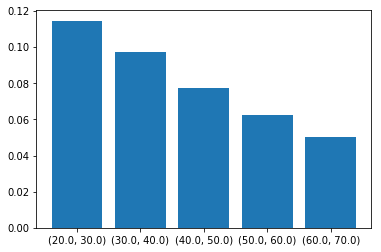

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline
height=list(app_group['TARGET'])
bars=((20.0, 30.0),(30.0, 40.0),(40.0, 50.0),(50.0, 60.0),(60.0, 70.0))
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
